# ¿Cuáles son los dos módulos descritos en la sesión anterior para poder generar interfaces gráficas?

# Visualización en Python

<b>Matplotlib:</b> Requiere múltiples configuraciones

<b>Pandas Visualization:</b> Interfaz amigable creada sobre Matplotlib pero que se construye sobre los dataframes

<b>Seaborn:</b> Interfaz de alto nivel 

<b>ggplot:</b> Basado en la librería ggplot2 de R 

<b>Plotly:</b> Puede crear gráficas interactivas 

In [83]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
from plotnine import *
import plotly.express as px
from pandas.plotting import scatter_matrix
import plotly.figure_factory as ff
import time
import plotly.graph_objects as go
import matplotlib.animation as animation

In [84]:
# pip install plotnine
# pip install plotnine

In [85]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df['target'] = pd.Series(iris['target'], name='target_values')
iris_df['target_name'] = iris_df['target'].replace([0, 1, 2],
                                                   ['iris-' + species for species in iris['target_names'].tolist()])

In [86]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,iris-setosa
1,4.9,3.0,1.4,0.2,0,iris-setosa
2,4.7,3.2,1.3,0.2,0,iris-setosa
3,4.6,3.1,1.5,0.2,0,iris-setosa
4,5.0,3.6,1.4,0.2,0,iris-setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,iris-virginica
146,6.3,2.5,5.0,1.9,2,iris-virginica
147,6.5,3.0,5.2,2.0,2,iris-virginica
148,6.2,3.4,5.4,2.3,2,iris-virginica


### Gráfica de líneas

#### Matplotlib
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

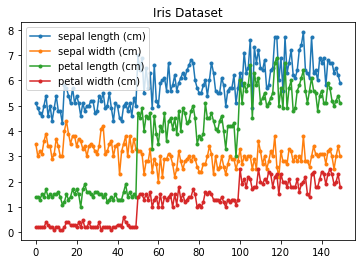

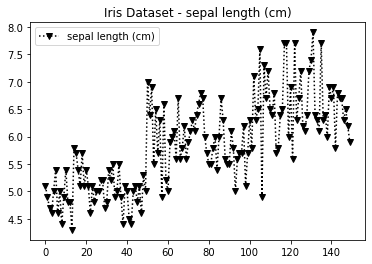

In [87]:
# get columns to plot
columns = iris_df.columns.drop(['target_name', 'target'])
# create x data
x_data = range(0, iris_df.shape[0])
# create figure and axis
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
# plot each column
for column in columns:
    ax1.plot(x_data, iris_df[column], label=column, marker='.')
ax2.plot(x_data, iris_df['sepal length (cm)'], label='sepal length (cm)', marker='v', color='k', linestyle=':')
# set title and legend
ax1.set_title('Iris Dataset')
ax1.legend()
ax2.set_title('Iris Dataset - sepal length (cm)')
ax2.legend()

#### Pandas
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

<AxesSubplot:title={'center':'Iris Dataset'}>

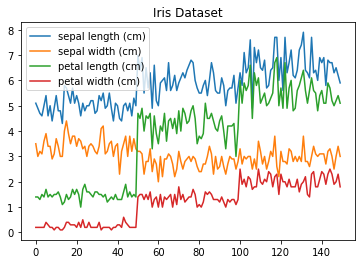

In [88]:
iris_df.drop(['target', 'target_name'], axis=1).plot.line(title='Iris Dataset')

#### Seaborn
https://seaborn.pydata.org/generated/seaborn.lineplot.html

Text(0.5, 1.0, 'Iris Dataset')

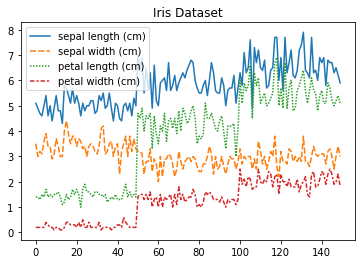

In [89]:
sns.lineplot(data=iris_df.drop(['target', 'target_name'], axis=1)).set_title('Iris Dataset')

### Plotly
https://plotly.com/python/line-charts/

In [90]:
fig = px.line(iris_df, y=iris_df['petal length (cm)'], title='Iris Data set')
fig.show()

### Scatter plot

#### ggplot2

https://plotnine.readthedocs.io/en/stable/generated/plotnine.ggplot.html

Proporciona una forma extremadamente intuitiva y consistente de graficar sus datos ya que está basado en el uso de "La gramática de los gráficos" la cual consta de los siguientes componentes:

In [91]:
from IPython.display import Image

Image('grammar of graphics.png')

FileNotFoundError: No such file or directory: 'grammar of graphics.png'

FileNotFoundError: No such file or directory: 'grammar of graphics.png'

<IPython.core.display.Image object>

Después de identificar los datos a visualizar, se debe especificar las variables que interesan. En tercer lugar, se debe definir qué tipo de objeto geométrico se desea utilizar. 

Estos tres primeros componentes son obligatorios. 

Las facetas se refieren a especificaciones de subparcelas, es decir, trazar varias variables dentro de sus datos una al lado de la otra en parcelas separadas. 

Las transformaciones estadísticas se refieren principalmente a la inclusión de estadísticas en el resumen gráfico.

Las coordenadas describen los diferentes sistemas de coordenadas disponibles. 

Los temas brindan una variedad de opciones para diseñar todos los elementos que no son datos del gráfico, como la leyenda, el fondo o las anotaciones.

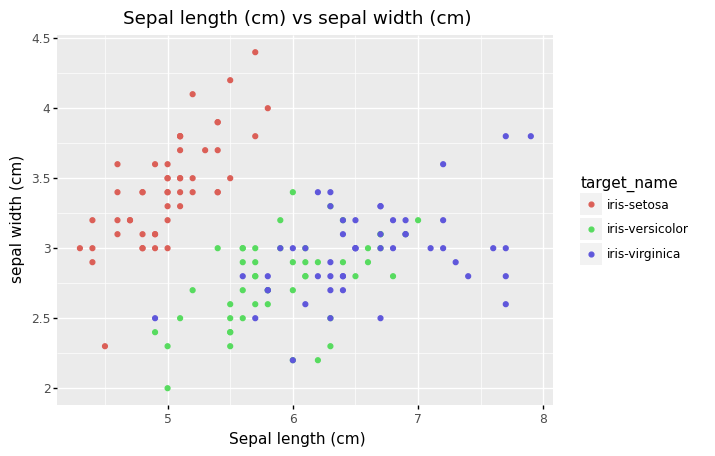

<ggplot: (8758863117653)>

In [92]:
(ggplot(iris_df)  # defining what data to use
 + aes(x='sepal length (cm)', y='sepal width (cm)', color='target_name')  # defining what variable to use
 + geom_point()  # defining the type of plot to use
 + labs(title='Sepal length (cm) vs sepal width (cm)', x='Sepal length (cm)', y='sepal width (cm)')
 # customizing labels
 )

#### Plotly
https://plotly.com/python/line-and-scatter/

https://plotly.com/python/3d-scatter-plots/

In [93]:
fig = px.scatter(iris_df, x="petal length (cm)", y="petal width (cm)", color="target_name", size='sepal length (cm)',
                 hover_data=['sepal width (cm)'])
fig.show()

In [94]:
fig = px.scatter_3d(
    iris_df, x='sepal length (cm)', y='sepal width (cm)', z='petal width (cm)', color='petal length (cm)',
    size='petal length (cm)', size_max=20
)
fig.show()

### Mapa de calor

In [95]:
corr = iris_df.corr()

#### Matplotlib
https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html

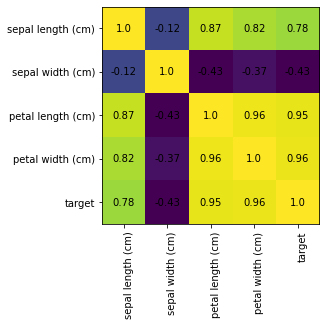

In [96]:
fig, ax = plt.subplots()
# create heatmap
im = ax.imshow(corr.values)

# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = ax.text(j, i, np.around(corr.iloc[i, j], decimals=2),
                       ha="center", va="center", color="black")

#### Seaborn
https://seaborn.pydata.org/generated/seaborn.heatmap.html

<AxesSubplot:>

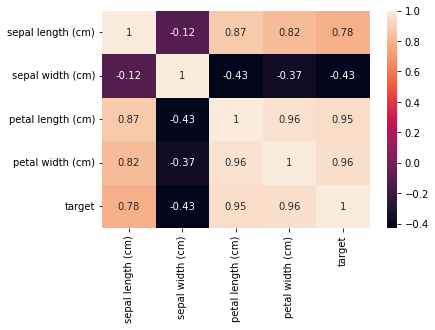

In [97]:
sns.heatmap(corr, annot=True)

#### Plotly
https://plotly.com/python/heatmaps/

In [98]:
fig = px.imshow(corr)
fig.update_layout(
    title='Iris Data set correlation matrix',
)
fig.show()

### Ejercicio.

Crear una gráfica de barras con matplotlib con el conteo de cada observación de las especies del dataset iris

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

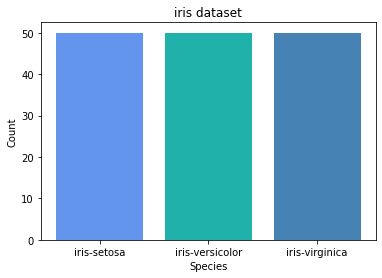

In [99]:
df = iris_df.groupby("target_name")['sepal length (cm)'].count().to_frame().reset_index()
plt.bar(df['target_name'],df['sepal length (cm)'], color=['cornflowerblue','lightseagreen','steelblue'])
plt.title('iris dataset')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

### Múltiples gráficas

#### Matplotlib

[Text(0, 0.5, 'sepal width')]

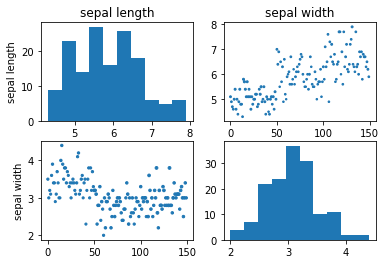

In [100]:
fig, (axs1, axs2) = plt.subplots(2, 2)
axs1[0].hist(iris_df['sepal length (cm)'], bins=10)
axs1[1].scatter(x_data, iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], )
axs2[0].scatter(x_data, iris_df['sepal width (cm)'], iris_df['sepal length (cm)'])
axs2[1].hist(iris_df['sepal width (cm)'], bins=10)
axs1[0].set_title("sepal length")
axs1[1].set_title("sepal width")
axs1[0].set(ylabel="sepal length")
axs2[0].set(ylabel="sepal width")

#### Pandas

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

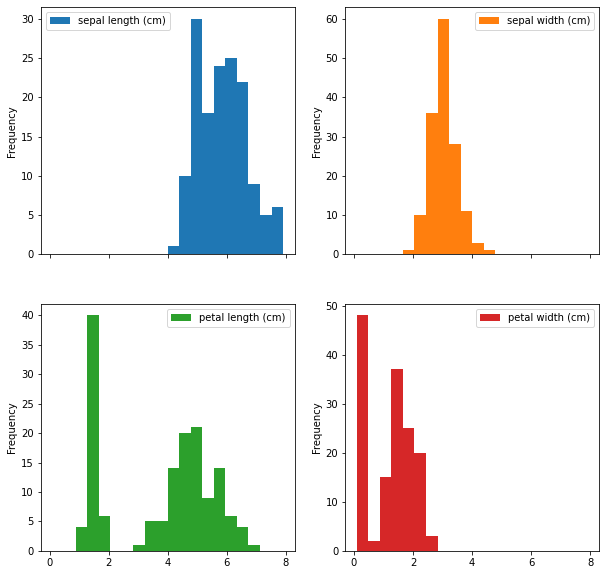

In [101]:
iris_df.drop(['target', 'target_name'], axis=1).plot.hist(subplots=True, layout=(2, 2), figsize=(10, 10), bins=20)

####  Seaborns pairplot
https://seaborn.pydata.org/generated/seaborn.pairplot.html

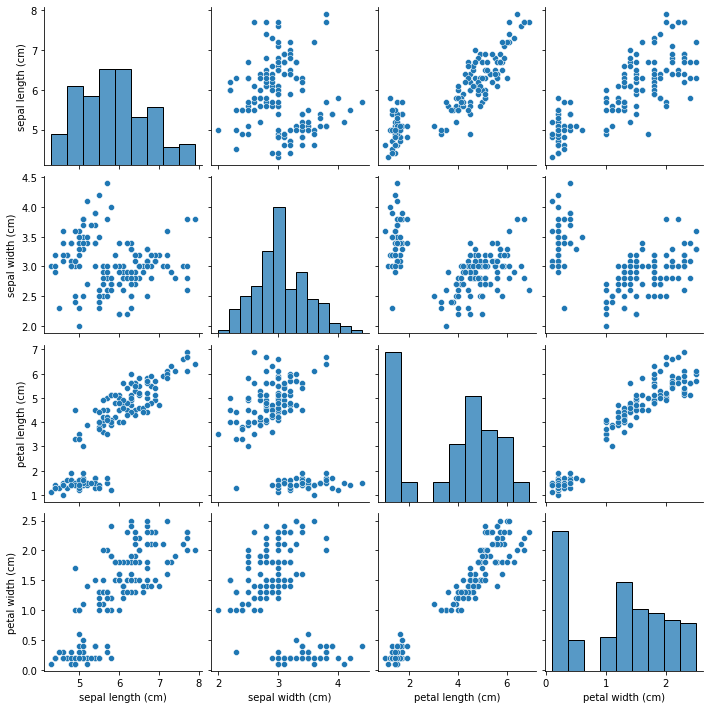

In [102]:
sns.pairplot(iris_df.drop(['target', 'target_name'], axis=1))

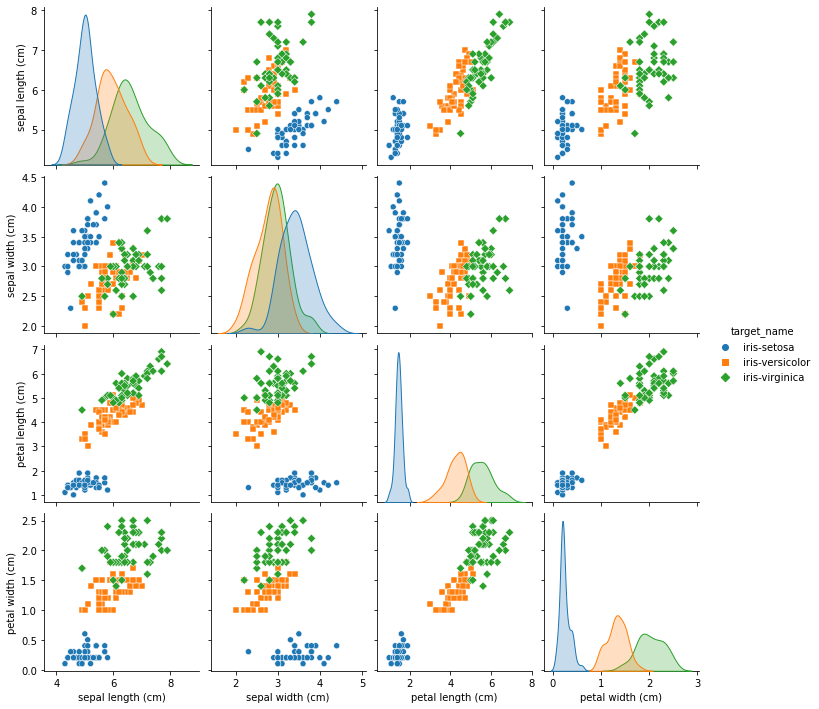

In [103]:
sns.pairplot(iris_df.drop(['target'], axis=1), hue="target_name", markers=["o", "s", "D"])

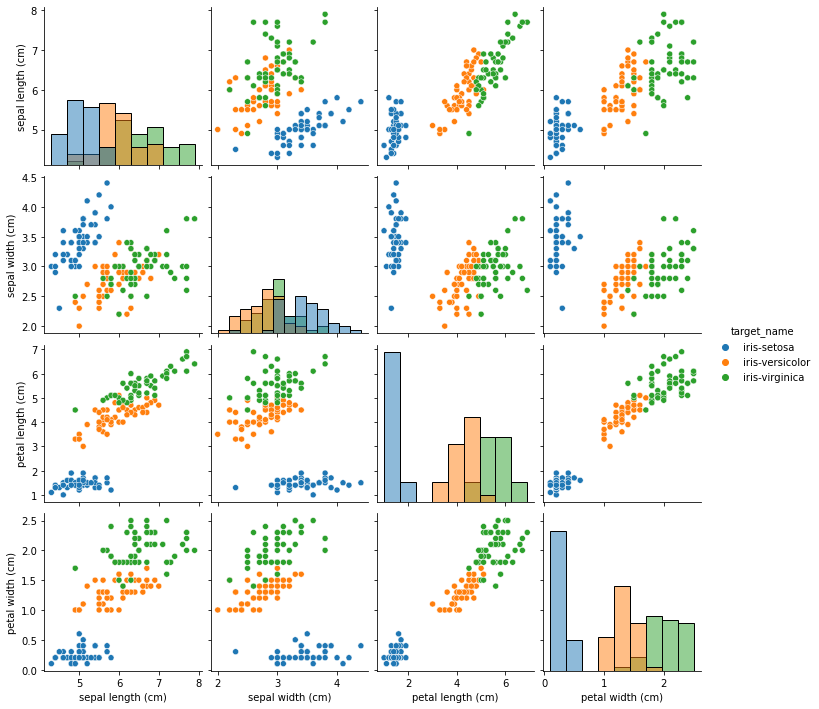

In [104]:
sns.pairplot(iris_df.drop(['target'], axis=1), hue="target_name", diag_kind="hist")

#### Pandas scatter matrix
https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html

/tmp/ipykernel_9670/4229509162.py:2: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

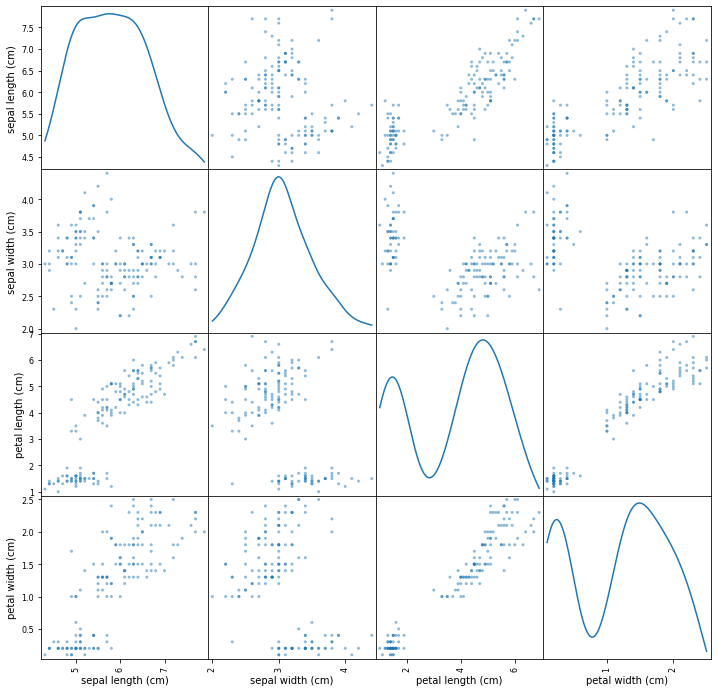

In [105]:
fig, ax = plt.subplots(figsize=(12, 12))
scatter_matrix(iris_df.drop(['target'], axis=1), ax=ax, diagonal='kde')

#### Plotly 
https://plotly.com/python/splom/#splom-of-the-iris-data-set

https://plotly.com/python/v3/legacy/scatterplot-matrix/

In [106]:
fig = px.scatter_matrix(iris_df, dimensions=["sepal width (cm)", "sepal length (cm)",
                                             "petal width (cm)", "petal length (cm)"],
                        color="target_name")
fig.update_layout(
    title='Iris Data set',
    width=750,
    height=750,
)
fig.show()

In [107]:
fig = ff.create_scatterplotmatrix(iris_df.drop(['target'], axis=1), diag='histogram', index='target_name',
                                  height=800, width=800)
fig.update_layout(
    title='Iris Data set',
    width=750,
    height=750,
)
fig.show()

### Gráficas dinámicas e interactivas

In [108]:
% matplotlib notebook
fig, ax = plt.subplots()
ax.set_xlabel('Observación');
ax.set_ylabel('length (cm)')
plt.plot(iris_df['petal length (cm)'])
plt.show()

UsageError: Line magic function `%` not found.


In [ ]:
# Cambiar matplotlib backend 
% matplotlib notebook

# Función dinámica para graficar los datos
def plt_dynamic(x, y, ax, colors=['r']):
    for color in colors:
        ax.plot(x, y, color, marker='o', linestyle='-.')
        plt.rcParams["figure.figsize"] = [5, 5]
        plt.rcParams["figure.autolayout"] = True
        fig.canvas.draw()


# Configuración de la figura

fig, ax = plt.subplots()
ax.set_xlabel('Observación');
ax.set_ylabel('length (cm)')
ax.set_xlim(0, 150);
ax.set_ylim(0, 10)
xs, ys, zs = [], [], []

# Loop para iterar en los datos y dibujarlos

for x in range(len(iris_df)):
    y = iris_df['petal length (cm)'][x]
    z = iris_df['petal width (cm)'][x]
    xs.append(x)
    ys.append(y)
    zs.append(z)
    if x % 10 == 0:
        plt_dynamic(xs, ys, ax, colors=['r'])
        plt_dynamic(xs, zs, ax, colors=['b'])
        time.sleep(.25)

plt_dynamic(xs, ys, ax, colors=['r'])
plt_dynamic(xs, zs, ax, colors=['b'])

In [ ]:
figure = px.scatter(data_frame=iris_df, x="sepal width (cm)",
                    y="sepal length (cm)",
                    color="target_name",
                    size="petal width (cm)",
                    animation_frame="target_name", )
figure.show()
figure.write_html("Iris.html")